Correlation Table for S&P 500?

## Stock Price prediction based on the usage of RNN | LSTM

Predicting the close stock price

In [1]:
!pip install --upgrade mplfinance
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 1.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 4.3 MB/s eta 0:00:00
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
import math
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
# from mplfinance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')


Fill in the stock you want to crawl:

In [6]:
company = 'QQQ'
provider = 'yahoo'

In [10]:
# Get stock quote
#start = datetime.datetime(2018, 3, 1) # Change Date if needed
start = datetime.datetime(2018, 1, 1) # Change Date if needed

end = datetime.datetime.now()
#df = web.DataReader(company, provider, start, end)

In [1]:
df = web.DataReader(company, provider, start, end)

In [ ]:
'''plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()'''

"plt.figure(figsize = (18,9))\nplt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)\nplt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)\nplt.xlabel('Date',fontsize=18)\nplt.ylabel('Mid Price',fontsize=18)\nplt.show()"

In [ ]:
# Look at closing price for every day of this year
'''plt.figure(figsize=(12,6))
plt.title('Close Price Hist',fontsize=11)
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize=11)
plt.ylabel('Close Price US $', fontsize=11)'''

In [ ]:
df.shape

(1697, 6)

In [ ]:
df['70ma'] = df['Adj Close'].rolling(window=70).mean()
df['20ma'] = df['Adj Close'].rolling(window=20).mean()
df.dropna(inplace=True)

In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,70ma,20ma
Date,,,,,,,,
2022-11-16,289.480011,284.600006,287.390015,285.440002,48859800.0,285.440002,288.331595,275.727499
2022-11-17,286.320007,280.720001,280.880005,284.809998,55462100.0,284.809998,287.752519,276.512500
2022-11-18,287.989990,282.320007,287.890015,284.820007,53351400.0,284.820007,287.199967,276.982500
2022-11-21,284.579987,281.040009,283.399994,281.890015,40083500.0,281.890015,286.515577,277.154500
2022-11-22,285.687897,280.480011,282.640015,285.609985,34442118.0,285.609985,285.846255,277.224500


In [ ]:
# df_small = df.tail(100)

In [ ]:

'''ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex=ax1)
#ax1.ticklabel_format(useOffset=False)
ax1.ticklabel_format(style='plain')


ax1.plot(df_small.index, df_small['Adj Close'])
ax1.plot(df_small.index, df_small['70ma'])
#ax1.plot(df.index, df_small['20ma'])
ax1.plot(df_small.index, df_small['Volume'])

plt.show'''

"ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)\nax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex=ax1)\n#ax1.ticklabel_format(useOffset=False)\nax1.ticklabel_format(style='plain')\n\n\nax1.plot(df_small.index, df_small['Adj Close'])\nax1.plot(df_small.index, df_small['70ma'])\n#ax1.plot(df.index, df_small['20ma'])\nax1.plot(df_small.index, df_small['Volume'])\n\nplt.show"

In [ ]:
df_ohlc = df['Adj Close'].resample('10D').ohlc() # open high low close
df_ohlc.dropna(inplace=True)
df_vol = df['Volume'].resample('10D').sum()

In [ ]:
df_ohlc.tail(5)

,open,high,low,close
Date,,,,
2022-10-05,281.980011,281.980011,260.739990,260.739990
2022-10-15,269.350006,278.450012,269.109985,278.450012
2022-10-25,284.209991,284.209991,260.489990,260.489990
2022-11-04,264.679993,287.959991,263.320007,287.959991
2022-11-14,285.440002,289.390015,281.890015,285.609985


In [ ]:
df_ohlc.reset_index(inplace=True)

In [ ]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

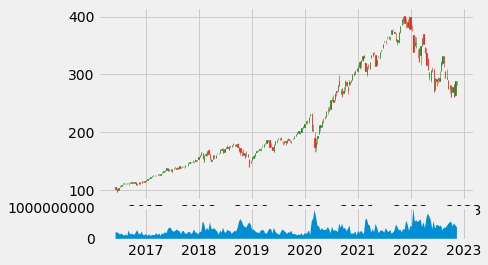

In [ ]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex=ax1)
ax2.ticklabel_format(style='plain')

ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_vol.index.map(mdates.date2num), df_vol.values,0)

## Train the model

In [ ]:
df.head(2)

,High,Low,Open,Close,Volume,Adj Close,70ma,20ma
Date,,,,,,,,
2016-06-08,110.599998,109.959999,110.370003,110.370003,14568700.0,105.066536,102.637550,102.988898
2016-06-09,110.309998,109.709999,109.919998,110.190002,17571600.0,104.895172,102.701641,103.171197


In [ ]:
# Create new df w/ "Close" col

df2 = df.filter(['Close'])
# convert to numpy array
dataset = df2.values

# Get no of rows to train the (LSTM) model on
# train it on 80 % of the data 
training_data_len = math.ceil(len(dataset) * .8)  # math.ceil -> rounding
training_data_len

1303

In [ ]:
# Scale the data (scaling or normalization helps the model)

scaler = MinMaxScaler(feature_range=(0,1))  # values / features ranges 0-1 inclusive

# Transformed data
scaled_data = scaler.fit_transform(dataset.reshape(-1,1))
# scaled_data

In [ ]:
# Create the training data set
# Create scaled training data set
# train_data = scaled_data[0:training_data_len, :]

# Split data into x_train & y_train data set
#reate empty lists
x_train = [] # independent variables / features
y_train = [] # dependent / target variable

prediction_days = 180 # 60 days, modify as needed

for i in range(prediction_days, len(scaled_data)):  
    x_train.append(scaled_data[i - prediction_days:i, 0]) # never reaches i, not including i
    y_train.append(scaled_data[i, 0])
    # if i  <= 60:
        #print(x_train)
        #print()
        #print(y_train)
        #print()

In [ ]:
# Convert x_train & y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(1448, 180)

In [ ]:
# Reshape data, LSTM expects input to be 3-dimensional
# x_train = np.shape(x_train, (943, 60, 1))
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))



In [ ]:
# Build LSTM model
# This will be the model architecture
from keras.layers import Dropout


model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape=(x_train.shape[1], 1)))
#model.add(Dropout(.2))
model.add(LSTM(20, return_sequences=True))
#model.add(Dropout(.2))
model.add(LSTM(20, return_sequences=False))
#model.add(Dense(25))
model.add(Dense(1))

# the number of hidden units should be in-between the number of input units and output classes

In [ ]:
'''# Build LSTM model
# This will be the model architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))'''

'# Build LSTM model\n# This will be the model architecture\nmodel = Sequential()\nmodel.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))\nmodel.add(LSTM(50, return_sequences=False))\nmodel.add(Dense(25))\nmodel.add(Dense(1))'

In [ ]:
# cat boost -> https://catboost.ai/en/docs/concepts/parameter-tuning

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
# Train model
# model.fit(x_train, y_train, batch_size=5, epochs=7) 
history = model.fit(x_train, y_train, epochs=10, batch_size=5) #validation_split=0.33  , verbose=0


Epoch 1/10
290/290 [==============================] - 56s 172ms/step - loss: 0.0075 - accuracy: 6.9061e-04
Epoch 2/10
290/290 [==============================] - 50s 171ms/step - loss: 0.0013 - accuracy: 6.9061e-04
Epoch 3/10
290/290 [==============================] - 52s 179ms/step - loss: 0.0014 - accuracy: 6.9061e-04
Epoch 4/10
290/290 [==============================] - 50s 171ms/step - loss: 0.0010 - accuracy: 6.9061e-04
Epoch 5/10
290/290 [==============================] - 49s 170ms/step - loss: 8.0352e-04 - accuracy: 6.9061e-04
Epoch 6/10
290/290 [==============================] - 50s 171ms/step - loss: 7.2794e-04 - accuracy: 6.9061e-04
Epoch 7/10
290/290 [==============================] - 53s 182ms/step - loss: 6.0856e-04 - accuracy: 6.9061e-04
Epoch 8/10
290/290 [==============================] - 51s 176ms/step - loss: 6.1332e-04 - accuracy: 6.9061e-04
Epoch 9/10
290/290 [==============================] - 49s 171ms/step - loss: 5.7885e-04 - accuracy: 6.9061e-04
Epoch 10/10
290/2

In [ ]:
'''plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()'''

"plt.plot(history.history['accuracy'])\nplt.plot(history.history['val_accuracy'])\nplt.title('model accuracy')\nplt.ylabel('accuracy')\nplt.xlabel('epoch')\nplt.legend(['train', 'test'], loc='upper left')\nplt.show()"

In [ ]:
# Create testing dataset
# Create new array containing scaled values from 900 - 960
test_data = scaled_data[training_data_len - prediction_days: , :]

# Create data set x_test & y_test
x_test = []
y_test = dataset[training_data_len: , :]  # all of values that we want the model to predict, the actual test values
for i in range(prediction_days, len(test_data)):
    x_test.append(test_data[i- prediction_days:i, 0])

In [ ]:
# Convert data to numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape data -> 3-dimensional shape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))   # x_test.shape[0] -> number of samples ; x_test.shape[1] -> number of timesteps; number of features: 1 (close price)


In [ ]:
# Get the models predicted price values

predictions = model.predict(x_test)
# we want predictions to contain same values as y_test data set
predictions = scaler.inverse_transform(predictions)  # unscale values

11/11 [==============================] - 2s 40ms/step


In [ ]:
# Get root mean square error (RSME)
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))

In [ ]:
# rmse =np.sqrt(np.mean(((predictions- y_test)**2)))
# rmse = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
# rmse = np.sqrt(((predictions - y_test) ** 2).mean())

In [ ]:
rmse

9.007217264072866

### Plotting 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


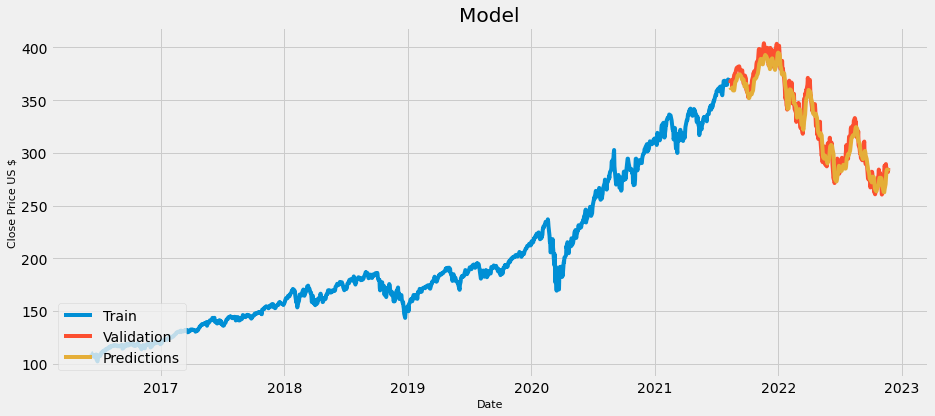

In [ ]:
# Plot data
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

# Viz
plt.figure(figsize=(14,6))
plt.title('Model')
plt.xlabel('Date', fontsize=11)
plt.ylabel('Close Price US $', fontsize=11)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower left')

blue = data the model was trained on
red = actual values / actual closing price for the dates
orange = what model predicted to be

In [ ]:
# Show valid and predicted price
valid.tail()

,High,Low,Open,Close,Volume,Adj Close,70ma,20ma,Predictions
Date,,,,,,,,,
2022-11-16,289.480011,284.600006,287.390015,285.440002,48859800.0,285.440002,288.331595,275.727499,280.336823
2022-11-17,286.320007,280.720001,280.880005,284.809998,55462100.0,284.809998,287.752519,276.512500,283.181519
2022-11-18,287.989990,282.320007,287.890015,284.820007,53351400.0,284.820007,287.199967,276.982500,284.181946
2022-11-21,284.579987,281.040009,283.399994,281.890015,40083500.0,281.890015,286.515577,277.154500,283.949066
2022-11-22,285.687897,280.480011,282.640015,285.609985,34442118.0,285.609985,285.846255,277.224500,282.629822


# Predict close price for future

In [ ]:
df_future = df.filter(['Close'])
last_60_days = df_future[-prediction_days:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 38ms/step
[[281.55615]]


In [ ]:
df_future = df.filter(['Close'])
last_60_days = df_future[-prediction_days-2:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(f'Prediction: {pred_price}')


1/1 [==============================] - 1s 1s/step
Prediction: [[281.55612]]


In [ ]:
# Prediction: [[283.78705]]


--------------------
--------------------

## Different approach

In [ ]:
test_start = datetime.datetime(2022,1,1)
test_end = datetime.datetime.now()

test_df = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_df['Close'].values

total_dataset = pd.concat((df['Close'], test_df['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_df) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [ ]:
# Make predictions on test data

In [ ]:
x_test = []

for i in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[i-prediction_days:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

8/8 [==============================] - 0s 42ms/step


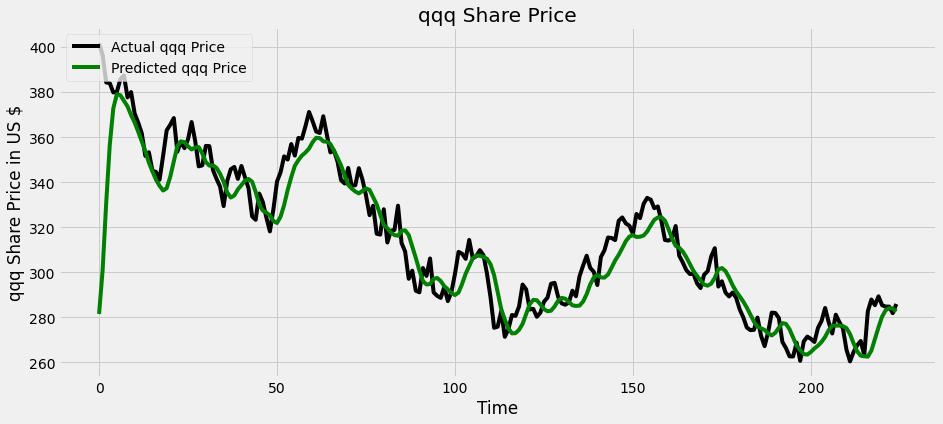

In [ ]:
# Plot the test pred
plt.figure(figsize=(14,6))
plt.plot(actual_prices, color='black', label=f'Actual {company} Price')
plt.plot(predicted_prices, color='green', label=f'Predicted {company} Price')
plt.title(f'{company} Share Price')
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price in US $')
plt.legend(loc='upper left')

In [ ]:
# Predict next day

real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs + 1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

# print(scaler.inverse_transform(real_data[-1]))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f'Prediction: {prediction}')


1/1 [==============================] - 0s 48ms/step
Prediction: [[281.6141]]


Different approach w/ avg of highest and lowest price



In [ ]:
# First calculate the mid prices from the highest and lowest
high_prices = df.loc[:,'High'].as_matrix()
low_prices = df.loc[:,'Low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0

In [ ]:
train_data = mid_prices[:11000]
test_data = mid_prices[11000:]

In [ ]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [ ]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 2500
for di in range(0,10000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

In [ ]:
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

In [ ]:
EMA = 0.0
gamma = 0.1
for ti in range(11000):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

In [ ]:
window_size = 100
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [ ]:
window_size = 100
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))


In [ ]:

plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()
